# Analyzing Used Car Listings on eBay Kleinanzeign

In this project, we'll work with a dataset of used cars from *ebay Kleinanzeigen*, a [classifieds](https://en.wikipedia.org/wiki/Classified_advertising) section of the German eBay website.

<img src="https://image.capital.de/33081870/t/j7/v7/w1440/r1.5/-/ebay.jpg" width="800" height="100">

The original dataset is available to download from [here](https://data.world/data-society/used-cars-data), but the dataset we're going to use has a few modifications:
* Our modified dataset has 50,000 data points from the full dataset, to ensure faster computation.
* The modified dataset is less-cleaned, which is a bit more resemble what we would expect from a scraped dataset (the orginal dataset version is cleaned to be easier to work with)

The data dictionary provided with data is a follows:
* `dateCrawled` - When this ad was first crawled. All field-values are taken from this date.
* `name` - Name of the car.
* `seller` - Whether the seller is private or a dealer.
* `offerType` - The type of listing
* `price` - The price on the ad to sell the car.
* `abtest` - Whether the listing is included in an A/B test.
* `vehicleType` - The vehicle Type.
* `yearOfRegistration` - The year in which the car was first registered.
* `gearbox` - The transmission type.
* `powerPS` - The power of the car in PS.
* `model` - The car model name.
* `kilometer` - How many kilometers the car has driven.
* `monthOfRegistration` - The month in which the car was first registered.
* `fuelType` - What type of fuel the car uses.
* `brand` - The brand of the car.
* `notRepairedDamage` - If the car has a damage which is not yet repaired.
* `dateCreated` - The date on which the eBay listing was created.
* `nrOfPictures` - The number of pictures in the ad.
* `postalCode` - The postal code for the location of the vehicle.
* `lastSeenOnline` - When the crawler saw this ad last online.

The aim of this project is to clean the data and analyze the included used car listings.

## Importing Libraries
Let's start by importing the libraries we need. We'll import the `Numpy` library to perform quick, vectorized operations on our data, `Pandas` library to extend the functionalities of Numpy even further, `Seaborn`, `Matplotlib`, and `Plotly` libraries to help us build informing visualizations.

In [1]:
# Ignore future warnings from pandas
import warnings
warnings.filterwarnings('ignore')

# Import useful libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from matplotlib import style
from matplotlib.patches import Patch
from matplotlib.ticker import MultipleLocator
from plotly.subplots import make_subplots

## Load Data

Our dataset is stored in csv (`autos.csv`). Lets load in the file using pandas `read_csv()` method and assign it to the variable `autos`.

In [2]:
# Read the file in csv
autos = pd.read_csv('/kaggle/input/used-cars-dataset/autos.csv', encoding='Latin-1')

In [3]:
# View the dataset
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


In [4]:
# View the dataset information
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [5]:
# Display first five rows
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


**Observations**

From the work we did above, we can make the following observations:
* The dataset contains 20 columns, most of which are strings.
* Some columns have null values, but none have more than ~20% null values.
* The column names use [camelcase](https://en.wikipedia.org/wiki/Camel_case) instead of Python's preferred [snakecase](https://en.wikipedia.org/wiki/Snake_case), which means we can't just replace spaces with underscores.

## Data Cleaning

### 1. Cleaning Columns Names

Let's convert the column names from `camelcase` to `snakecase` and reword some of the column names based on the data dictionary to be more descriptive.

We can see the existing column names in the code cell below using `DataFrame.columns` attribute.

In [6]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

We can copy the above array and make the following edits to column names:
* `yearOfRegistration` to `registration_year`
* `monthOfRegistration` to `registration_month`
* `notRepairedDamage` to `unrepaired_damage`
* `dateCreated` to `ad_created`
* The rest of the column names from camelcase to snakecase.

In [7]:
modified_col_names = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
                      'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
                      'odometer', 'registration_month', 'fuel_type', 'brand',
                      'unrepaired_damage', 'ad_created', 'num_pictures', 'postal_code',
                      'last_seen']

We can now assign the modified column names back to the `DataFrame.columns` attribute, then we look at the current state of the `autos` DataFrame using `DataFrame.head()` after column modification.

In [8]:
autos.columns = modified_col_names
autos.head()

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


Now let's do some basic data exploration to determine what other cleaning tasks need to be done. Initially we will look for:
* Text columns where all or almost all values are the same. These can often be dropped as they don't have useful information for analysis.
* Examples of numeric data stored as text which can be cleaned and converted.

The following methods are helpful for exploring the data:
* `DataFrame.describe()` (with `include='all'` to get both categorical and numeric columns)
* `Series.value_counts()` and `Series.head()` if any columns need a closer look.

In [9]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


**Observations**
* The columns `seller`, `offer_type`, `ab_test`, `gear_box` and `unrepaired_damage` seem to have only 2 unique values.
* `num_pictures` contains 50,000 null values. That seems unusual.

Let's deal with the columns having 2 unique values:

In [10]:
# Loop through each column and display the frequency of each unique value
unique_list = ['seller', 'offer_type', 'ab_test', 'gearbox', 'unrepaired_damage']

for item in unique_list:
    print('-'*30)
    print(autos[item].value_counts())
    print('-'*30)

------------------------------
privat        49999
gewerblich        1
Name: seller, dtype: int64
------------------------------
------------------------------
Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64
------------------------------
------------------------------
test       25756
control    24244
Name: ab_test, dtype: int64
------------------------------
------------------------------
manuell      36993
automatik    10327
Name: gearbox, dtype: int64
------------------------------
------------------------------
nein    35232
ja       4939
Name: unrepaired_damage, dtype: int64
------------------------------


**Observations**

The `seller` and `offer_type` columns are heavily one-sided:
* In the `seller` column, *privat* means *private* and *gewerblick* means *commerical*. This tells us that most records in the dataset were from **private sellers**.
* In the `offer_type`, *angebot* stands for *offer*, while *gesuch* stands for *request*. This tells us that majority of the records are **car offered** for sale.

These columns are far too one-sided to add helpful information to our analysis. We will drop them, but first, let's investigate the `num_pictures` column.

In [11]:
autos['num_pictures'].value_counts()

0    50000
Name: num_pictures, dtype: int64

All the data in `num_pictures` is 0: it appears that none of the listings contain any pictures. We will drop this column along with `seller` and `offer_type`.

In [12]:
print(f'Before dropping columns: {autos.shape}')
autos = autos.drop(['seller', 'offer_type', 'num_pictures'], axis='columns')
print(f'After dropping columns: {autos.shape}')

Before dropping columns: (50000, 20)
After dropping columns: (50000, 17)


### 2. Translating Non-English Words

In the previous observation, we manually interpreted the meaning of the terms in the `seller` and `offer_type` columns. Repeating this process for all affected columns will be cumbersome in the long run.

In total, there were six columns recorded in German. However, we had already dropped two of the affected columns. We will explore the remaining four in detail:

In [13]:
# Display the unique german words in each column of interest
german_columns = ['vehicle_type', 'gearbox', 'fuel_type', 'unrepaired_damage']
for column in german_columns:
    print()
    print(f'{column}: {autos[column].unique()}')


vehicle_type: ['bus' 'limousine' 'kleinwagen' 'kombi' nan 'coupe' 'suv' 'cabrio'
 'andere']

gearbox: ['manuell' 'automatik' nan]

fuel_type: ['lpg' 'benzin' 'diesel' nan 'cng' 'hybrid' 'elektro' 'andere']

unrepaired_damage: ['nein' nan 'ja']


We can use this information to create a dictionary of translations for each German word. Then, use a function `column_translator()` to iterate through each of the affected columns, while mapping the right English words from our dictionary. The `Series.map()` method will handle the translation/mapping process for us:

In [14]:
# A dictionary of translations
translations = {# vehicle type terms
               'bus':'bus',
               'limousine':'limousine',
               'kleinwagen': 'small car',
               'kombi': 'combo',
               'coupe':'coupe',
               'suv':'suv',
               'cabrio': 'cabrio',
               'andere': 'other',
               'cabrio': 'convertible',
               # gear box terms
               'manuell': 'manual',
               'automatik': 'automatic',
               # fuel type terms
               'lpg':'lpg',
               'benzin': 'gasoline',
               'diesel':'diesel',
               'cng':'natural gas',
               'hybrid':'hybrid',
               'elektro':'electric',
               'andere':'other',
               # unrepaired damage terms
               'nein':'no',
               'ja':'yes'}

In [15]:
# Create a translator function
def column_translator(df, column, dict_value):
    '''Translates values in df column using value_dict as reference'''
    df[column] = df[column].map(dict_value)

Let's translate each of these columns. We will also print out the value counts before and after translation to ensure that the process ran adequately, without compromising our data:

In [16]:
for item in german_columns:
    print(f'BEFORE TRANSLATING\n{autos[item].value_counts(dropna=False)}')
    column_translator(df=autos, column=item, dict_value=translations)
    print(f'\nAFTER TRANSLATING\n{autos[item].value_counts(dropna=False)}')
    
    print('-'*30)
    print()

BEFORE TRANSLATING
limousine     12859
kleinwagen    10822
kombi          9127
NaN            5095
bus            4093
cabrio         3061
coupe          2537
suv            1986
andere          420
Name: vehicle_type, dtype: int64

AFTER TRANSLATING
limousine      12859
small car      10822
combo           9127
NaN             5095
bus             4093
convertible     3061
coupe           2537
suv             1986
other            420
Name: vehicle_type, dtype: int64
------------------------------

BEFORE TRANSLATING
manuell      36993
automatik    10327
NaN           2680
Name: gearbox, dtype: int64

AFTER TRANSLATING
manual       36993
automatic    10327
NaN           2680
Name: gearbox, dtype: int64
------------------------------

BEFORE TRANSLATING
benzin     30107
diesel     14567
NaN         4482
lpg          691
cng           75
hybrid        37
andere        22
elektro       19
Name: fuel_type, dtype: int64

AFTER TRANSLATING
gasoline       30107
diesel         14567
NaN      

### 3. Converting Non-numeric Columns to Numeric

We previously identified some object types that should have been saved as numeric; like the `price` and `odometer` columns. For each of these columns,
we will remove the non-numeric characters, convert the values to numeric, then use the `DataFrame.rename()` method to assign descriptive names.

The `price` column contains non-numeric characters like `$` and `,`, while the `odometer` column has `km` and `,` as its non-numeric characters.

In [17]:
autos['price'] = (autos['price']
                    .str.replace('$','')
                    .str.replace(',','')
                    .astype(int))

autos.rename(columns={'price': 'price_usd'}, inplace=True)
autos['price_usd'].head()

0    5000
1    8500
2    8990
3    4350
4    1350
Name: price_usd, dtype: int64

In [18]:
autos['odometer'] = (autos['odometer']
                    .str.replace('km','')
                    .str.replace(',','')
                    .astype(int))

autos.rename(columns={'odometer': 'odometer_km'}, inplace=True)
autos['odometer_km'].head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer_km, dtype: int64

### 4. Detecting Numeric Outliers

Let's continue by exploring the data for outliers. Specifically, we are looking for data that doesn't look right, especially in our numeric columns (`odometer_km` and `price_usd`). We'll analyze these columns using the five number summary (**min, Q1, median (Q2), Q3, max**) then look for any values that look unrealistically high or low.

In [19]:
autos[['odometer_km', 'price_usd']].describe()

,odometer_km,price_usd
count,50000.000000,5.000000e+04
mean,125732.700000,9.840044e+03
std,40042.211706,4.811044e+05
min,5000.000000,0.000000e+00
25%,125000.000000,1.100000e+03
50%,150000.000000,2.950000e+03
75%,150000.000000,7.200000e+03
max,150000.000000,1.000000e+08


**Observations**

* **Odometer_km**
    * The median and 75th percentile values are the same as the maximum value (150,000 km). The 25th percentile is set at around 125,000 km.
    * This indicates that a reading of 150,000 km is not an outlier, since 75% of the listed cars are between 125,000 to 150,000 km in mileage.

* **price_usd**
    * The maximum price is 100,000,000 USD. This varies significantly from the median and 75th percentile values of 2,950 and 72,000 USD respectively. The standard deviation is also considerably high (about 480,000 USD).
    * The minimum price of 0 is unusual and could affect our analysis.
    
We can futher explore `odometer_km` by displaying its sorted value counts:

In [20]:
autos['odometer_km'].value_counts().sort_index(ascending=False)

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
40000       819
30000       789
20000       784
10000       264
5000        967
Name: odometer_km, dtype: int64

**Additional Observations**
* The least mileage observed is 5000 km rather than 0 km. This is expected because the cars listed on this platform are used cars.
* Higher mileage cars (above 50,000 km) are more common on the listing than lower mileage ones.
* Over 30,000 (~65) cars have odometer readings of 150,000. This could imply that there is an upper mileage limit of 150,000 km of cars accepted for listing.

Next, we will explore `price_usd` and attempt to remove its outliers.

In [21]:
autos['price_usd'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price_usd, dtype: float64

### 5. Removing Price Column Outliers

As observed earlier, the `25th`, `50th` and `75th` percentile of the prices are `1,100`, `2,950` and `7,200` USD. We will use a selection method to create a **data fence** from our 25th to 75th percentiles. Any data beyond this fence will be considered an outlier.

We already have enough information to calculate our interquartile range `IQR`. We'll use the equation below to determine our upper and lower price fences:

```
    Interquartile Range (IQR) = 75th Percentile - 25th Percentile
    Lower fence = 25th Percentile - 1.5*(IQR)
    Upper fence = 75th Percentile + 1.5*(IQR)
```

Lets define all these boundaries in the code cell below:

In [22]:
price_25, price_75 = (1100, 7200)

IQR = price_75 - price_25
lower_fence = price_25 - (1.5*IQR)
upper_fence = price_75 + (1.5*IQR)

print(f'Interquartile Range: {IQR}')
print(f'Lower fence: {lower_fence}')
print(f'Upper fence: {upper_fence}')

Interquartile Range: 6100
Lower fence: -8050.0
Upper fence: 16350.0


Fences may extend beyond the data sometimes, so it is totally fine if our lower fence is negative. We should be mindful, however, that a minimum price value of `0` can also affect our analysis. In this case, it is advisable to eliminate the entries with zero prices too.

Before we proceed, let's take a look at how many listings are recorded at zero price.

In [23]:
autos['price_usd'].value_counts().head()

0       1421
500      781
1500     734
2500     643
1000     639
Name: price_usd, dtype: int64

Of the 50,000 rows in our dataset, 1,421 records (`~3%`) are listed at zero price. Since this percentage is very low, we can safely remove these entries. We will set our lower fence at `1` to exclude zero prices.

In [24]:
autos = autos[autos['price_usd'].between(1, upper_fence)]
autos['price_usd'].describe()

count    44795.000000
mean      4089.433620
std       3841.429247
min          1.000000
25%       1150.000000
50%       2700.000000
75%       5999.000000
max      16350.000000
Name: price_usd, dtype: float64

**Observations**
* Our dataset has been reduced to 44,795 rows in total.
* The 25th, 50th, and 75th percentiles are close to their initial values before cleaning.
* The standard deviation (3,841 USD) is considerably lower than the value of 480,000 USD recorded before.
* 16,350 USD is a better approximation for the maximum price than the previous value of 100,000,000 USD, considering that our 75th percentile is around 6,000 USD.

Lets now explore the date columns to understand the data range our data covers.

## Exploring the Date Columns

There are 5 columns in our dataset that should represent date values. Some of these columns were created by the crawler, while some were obtained from the website. We can differentiate by referring to the information below:
```
    - `date_crawled`: added by the crawler
    - `last_seen`: added by the crawler
    - `ad_created`: from the website
    - `registration_month`: from the website
    - `registration_year`: from the website
```

`date_crawled`, `last_seen`, and `ad_created` are currently identified as object types. To understand them quantitatively, we need to convert them to `datetime` objects.

`registration_month` and `registration_year` are represented as numeric values. Using the `describe()` method, we can uderstand their distribution, without any conversion.

Let's first understand how the values in the three string columns are formatted.

In [25]:
autos[['date_crawled', 'ad_created', 'last_seen']].head()

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


**Observations**
* It appears that the first 10 characters in each column represent the date in the yy-mm-dd format (e.g. 2016-03-12) and the other characters represent hours:minutes:seconds.

To understand the distribution of the dates, we can extract just the relevant values using a string method. We can use `Series.str[:10]` to select the first 10 characters in each column.

To understand the distribution of the dates, we'll create two function `calculate_dist()` and `display_dist()`. The purpose of these functions are as followed:
* **`calculate_dist()`**
    * Calculate the distribution (all string columns) as percentage.
    * Extract just the relevant values using a string method (Series.str[:10]), to select the first 10 characters in giving column.
    
* **`display_dist()`**
    * Display the distribution for interpretation.
    
Let's begin with our first column (`date_crawled`) for exploration.

### 1. Date Crawled

In [26]:
def calculate_dist(df, col):
    '''Takes the string column and convert it to datetime to calculate distribution'''
    
    if col != 'ad_created':
        dist_percent = df[col].str[:10].value_counts(normalize=True, dropna=False).round(3).sort_index()
        dist_dt = dist_percent.index.astype('datetime64[ns]').strftime('%Y-%b-%d') # Year-Month-Day format for column "data_crawled" and "last_seen"
        dist_values = dist_percent.values
        
        print(f'Column: {col}\n{dist_percent}')
    else:
        dist_percent = df[col].str[:10].value_counts(normalize=True, dropna=False).sort_index()
        dist_dt = dist_percent.index.astype('datetime64[ns]').strftime('%b-%d') # Month-Day format for column "ad_created"
        dist_values = dist_percent.values
        
        print(f'Earliest Date: {dist_percent.head(1)}')
        print('')
        print(f'Last Date: {dist_percent.tail(1)}')
        
    return dist_percent, dist_dt, dist_values

In [27]:
def display_dist(df, col, title='Ads Crawled Per Day (March - April 2016)'):
    '''Displays column distribuion'''
    # Figure settings
    plt.style.use('seaborn-dark')
    plt.figure(figsize=(15,6))
    
    # Call calculate_dist function
    dist_percent, dist_index, dist_values = calculate_dist(df, col)
    
    # Create line plot
    sns.lineplot(x=dist_index, y=dist_values, data=dist_percent)
    plt.xlabel("Date", fontsize=16)
    plt.ylabel("Ads crawled (% of Total)", fontsize=16)
    plt.xticks(rotation=90)
    plt.title(title, fontsize=26)
    
    # Statement to make annotion when using 'ad_created' column
    if col != 'ad_created':
        plt.show()
    else:
        plt.annotate(text='March 5', xy=('Mar-05', 0.02302195), xytext=('Feb-28', 0.026), arrowprops={'arrowstyle': '->'}, size=16, color='red')
        plt.show()

We've created both of our functions, let's visualize the distribution for column `date_crawled`.

Column: date_crawled
2016-03-05    0.026
2016-03-06    0.014
2016-03-07    0.036
2016-03-08    0.034
2016-03-09    0.033
2016-03-10    0.033
2016-03-11    0.032
2016-03-12    0.037
2016-03-13    0.016
2016-03-14    0.037
2016-03-15    0.034
2016-03-16    0.030
2016-03-17    0.032
2016-03-18    0.013
2016-03-19    0.034
2016-03-20    0.038
2016-03-21    0.037
2016-03-22    0.033
2016-03-23    0.032
2016-03-24    0.029
2016-03-25    0.032
2016-03-26    0.033
2016-03-27    0.031
2016-03-28    0.035
2016-03-29    0.034
2016-03-30    0.034
2016-03-31    0.032
2016-04-01    0.033
2016-04-02    0.035
2016-04-03    0.039
2016-04-04    0.036
2016-04-05    0.013
2016-04-06    0.003
2016-04-07    0.001
Name: date_crawled, dtype: float64


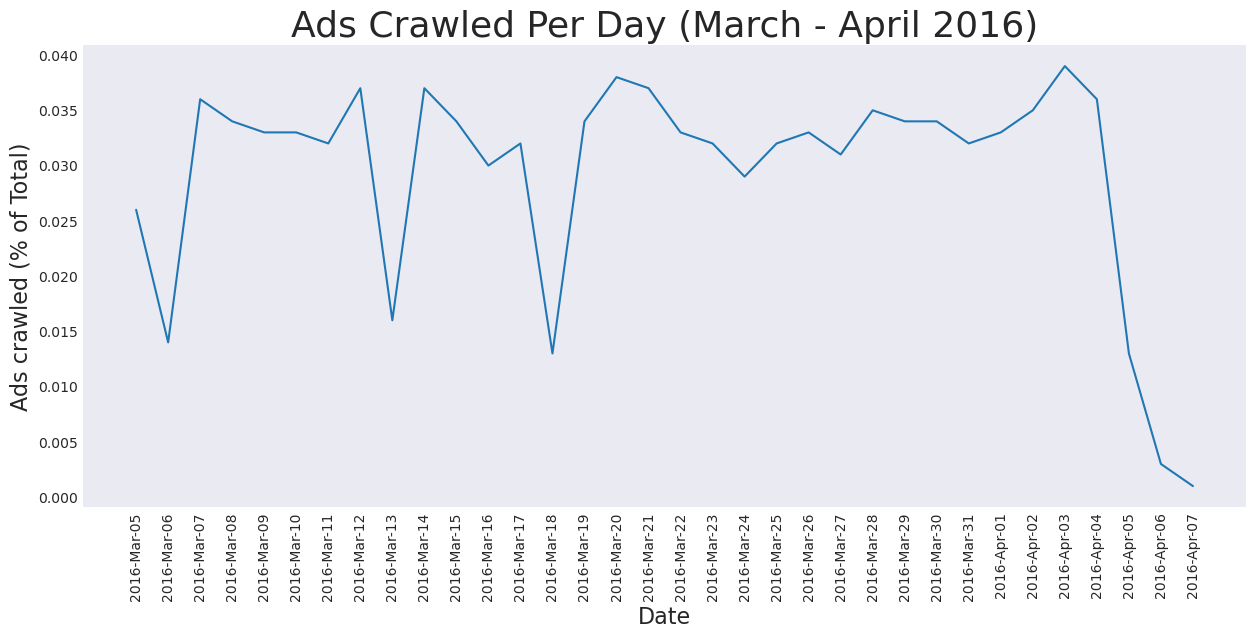

In [28]:
# Distribution of 'date_crawled'
display_dist(df=autos, col='date_crawled')

**Observations**
* It appears the crawler collected information from the site everyday between March 5, 2016 and April 7, 2016, a period of 34 days.
* Some occassional drops can be observed on some weekend days in March (6th, 13th, 18th); and the last 3 days in April. However, the number of ads crawled seem evenly distributed overall.

### 2. Ad Created

Next, we'll find out the distributed of `ads_created`.

Earliest Date: 2015-08-10    0.000022
Name: ad_created, dtype: float64

Last Date: 2016-04-07    0.001183
Name: ad_created, dtype: float64


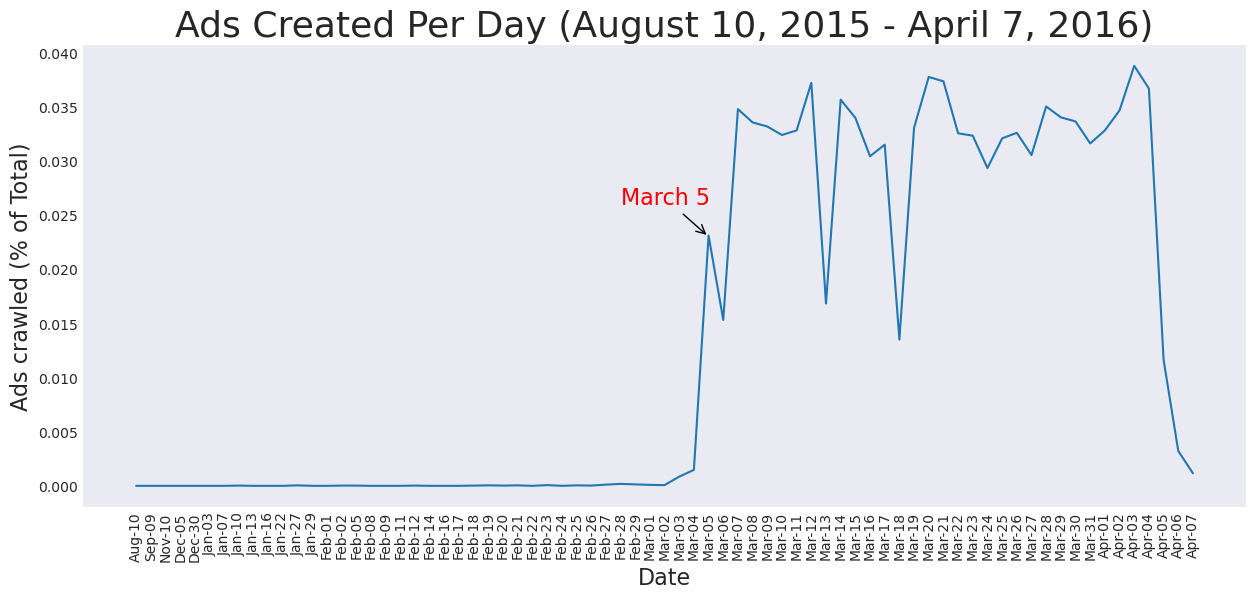

In [29]:
# Distribution of "ads_created"
display_dist(df=autos, col='ad_created',
             title='Ads Created Per Day (August 10, 2015 - April 7, 2016)')

**Observation**
* It appears that we are dealing with listings created between August 10, 2015 and April 7, 2016.
* Earlier, there were **very few** listings on the site. This pattern changed, especially on `March 5, 2016`, when we noticed a massive growth in listings. The number of listings has remained higher since then.
* Interestingly, March 5, 2016, was also the exact date when the crawler crawled the first group of ads from the website.

### 3. Last Seen

We now move on to our next column (`last_seen`) to explore distribution.

Column: last_seen
2016-03-05    0.001
2016-03-06    0.005
2016-03-07    0.006
2016-03-08    0.008
2016-03-09    0.010
2016-03-10    0.011
2016-03-11    0.013
2016-03-12    0.025
2016-03-13    0.009
2016-03-14    0.013
2016-03-15    0.016
2016-03-16    0.017
2016-03-17    0.029
2016-03-18    0.008
2016-03-19    0.016
2016-03-20    0.021
2016-03-21    0.021
2016-03-22    0.022
2016-03-23    0.019
2016-03-24    0.020
2016-03-25    0.020
2016-03-26    0.017
2016-03-27    0.016
2016-03-28    0.022
2016-03-29    0.023
2016-03-30    0.025
2016-03-31    0.024
2016-04-01    0.023
2016-04-02    0.025
2016-04-03    0.026
2016-04-04    0.025
2016-04-05    0.121
2016-04-06    0.214
2016-04-07    0.126
Name: last_seen, dtype: float64


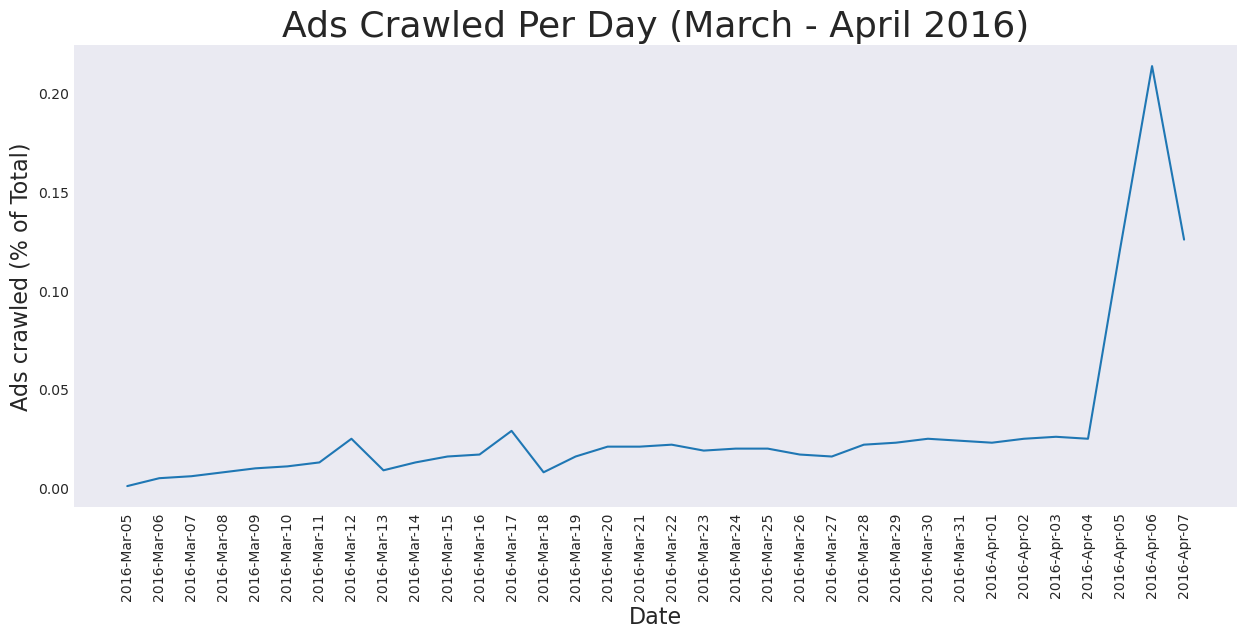

In [30]:
# Distribution of "last_seen"
display_dist(df=autos, col='last_seen')

**Observations**
* Since we know that the crawler also added the last seen information, it makes sense that the last seen column shows the same 34-day time span as the date crawled (March 5, 2016 to April 7, 2016).
* The number of last seen ads were relatively uniform througout the crawling period. However, it appears that the crawler noticed an increase in ad disappearances in the final few days (April 5 - April 7, 2016).
* This may give bits of insight into the crawlers activity. We can assume the crawlers daily routine. The crawler visits the site, collects information on different ads, then records the date crawled and last seen information for various ads.

### 4. Registration Year

Next, we are going to understand the distribution of `registration_year`.

In [31]:
autos['registration_year'].describe()

count    44795.00000
mean      2003.97339
std         74.81955
min       1000.00000
25%       1999.00000
50%       2003.00000
75%       2007.00000
max       9999.00000
Name: registration_year, dtype: float64

**Observation**
* **The registration year column contains some unexpected values**:
    * The minimum value is 1000, this is long before 1885 when cars were invented.
    * The maximum value is 9999, many years into the future. We are also aware that the listings were last seen by the crawler in 2016. A car can't be first registered after its listing has been seen.
    
Determining the earliest valid year can be challenging. However since we know that cars were invented in 1885, we can use the first few decades of 1900s as our lower cut off point. At the higher end, any record with registration year above 2016 is definitely inaccurate.

Before we eliminate thest rows, let's count the number of listings with cars that fall outside the 1900 - 2016 registration year and see if it's safe to remove these rows entirely without impacting our analysis too much.

In [32]:
# Rows that are not between 1900 and 2016
invalid_rows = (~autos['registration_year'].between(1900, 2016)).sum()
# Total number of rows
total_rows = autos['registration_year'].shape[0]
# Percentage of invalid rows
percentage_invalid = invalid_rows/total_rows * 100

print(f'The invalid years constitue {percentage_invalid:.1f} of the total data.')

The invalid years constitue 4.1 of the total data.


Since these years constitute only 4.1% of our total data. We can safely eliminate these records from our analysis.

In [33]:
# Extract rows where cars registration is from 1900 to 2016
autos = autos[autos['registration_year'].between(1900, 2016)]

# Calculate distribution of "registration_year" in percentage
years = (autos['registration_year']
         .value_counts(normalize=True)
         .sort_values(ascending=False)) # descending order

years

2000    0.073140
1999    0.067227
2005    0.067227
2003    0.062129
2004    0.061920
          ...   
1929    0.000023
1952    0.000023
1941    0.000023
1938    0.000023
1953    0.000023
Name: registration_year, Length: 70, dtype: float64

We've calculated the distribution of `registration_year`, let's plot the distribution and visualize it.

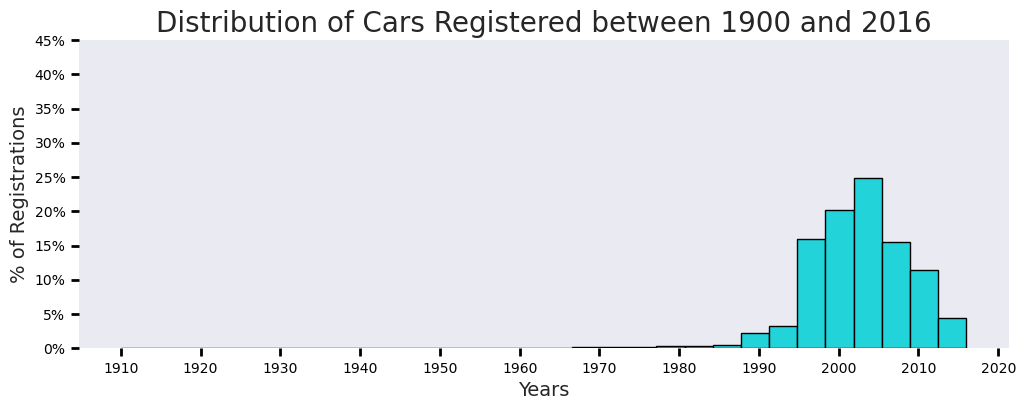

In [34]:
# Plot histogram of 'registration_year'
plt.figure(figsize=(12, 4))
plt.hist(years.index, bins=30, weights=years.values, color='#22D3D9', edgecolor='black')

# Set the title and axis labels
plt.title('Distribution of Cars Registered between 1900 and 2016', fontsize=20)
plt.xlabel('Years', fontsize=14)
plt.ylabel('% of Registrations', fontsize=14)

# Set x-axis properties
xtick_labels = [1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
plt.xticks(xtick_labels, size=10, color='black')
plt.tick_params(axis='x', length=6, width=2, color='black')

# Set y-axis properties
plt.yticks(np.arange(0, 0.5, 0.05), size=10, color='black')
plt.gca().yaxis.set_major_formatter('{:.0%}'.format)
plt.gca().yaxis.set_minor_locator(MultipleLocator(0.01))
plt.tick_params(axis='y', length=6, width=2, color='black')

plt.show()

**Observations**
* It appears that most of the vehicles were registered between 1990 and 2015. Only a small proportion of listed cars were registered before 1990.

### 5. Registration Month

We'll now move on to the column `registration_month` for further exploration.

In [35]:
autos['registration_month'].describe()

count    42959.000000
mean         5.791918
std          3.691957
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: registration_month, dtype: float64

Since the lowest value is set at 0 (presumably denoting January), we would expect the highest value to be at 11 (denoting December). However the highest value we see here is 12. This is quite unexpected.

We'll probe into this further.

In [36]:
autos['registration_month'].value_counts(normalize=True).sort_index()

0     0.092344
1     0.065760
2     0.060500
3     0.103308
4     0.082846
5     0.083405
6     0.087479
7     0.077679
8     0.064527
9     0.068624
10    0.074932
11    0.068111
12    0.070486
Name: registration_month, dtype: float64

**Observation**
* **This looks a bit more challanging**:
    * The months are evenly distributed. Hence it would not be a good idea to remove any month in favor of the others
    * No month is erroneously skipped, which further complicates what 0 and 12 are supposed to represent.
    
Since it is unclear where the error is from, we will drop the `registration_month` column as it could compromise our analysis.

In [37]:
autos = autos.drop(labels='registration_month', axis='columns')
autos.shape

(42959, 16)

## Data Analysis

### Exploring Price by Brand

Lets explore the unique values in the brand column to identify the most common brands in the used car listings.

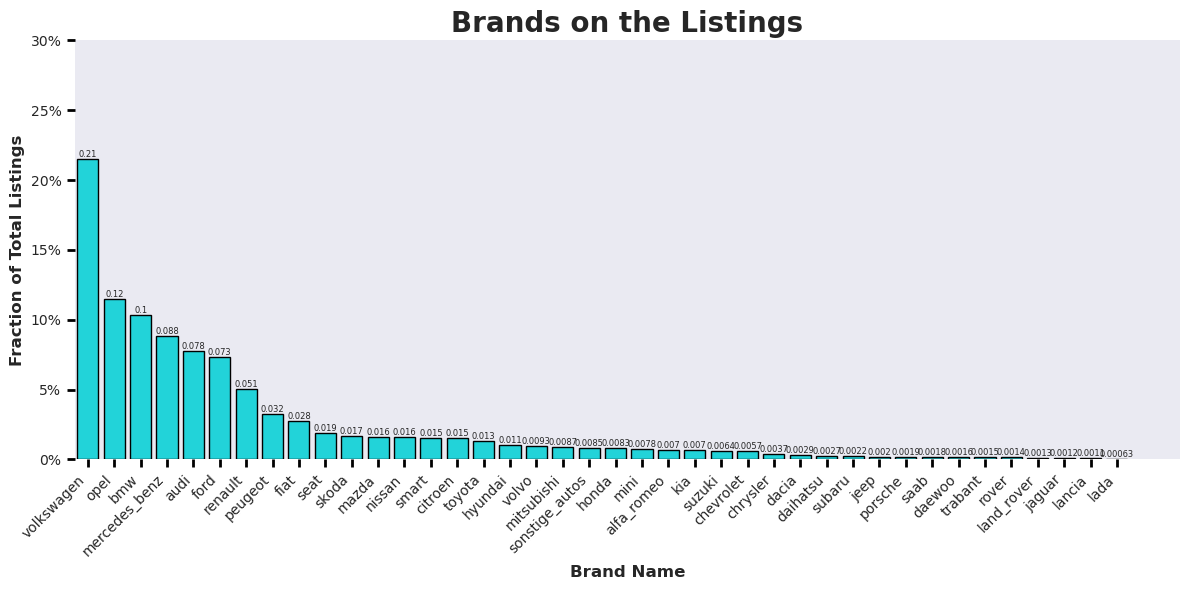

In [38]:
# Compute brands and their frequencies
brands = autos['brand'].value_counts(normalize=True)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar chart
bar_plot = ax.bar(brands.index, brands.values, color='#22D3D9', edgecolor='black')

# Set the x and y axis labels and title
ax.set_xlabel('Brand Name', fontsize=12, fontweight='bold')
ax.set_ylabel('Fraction of Total Listings', fontsize=12, fontweight='bold')
ax.set_title('Brands on the Listings', fontsize=20, fontweight='bold')

# Set the x-tick label properties
ax.set_xticklabels(brands.index, rotation=45, fontsize=10, ha='right')
ax.tick_params(axis='x', length=6, width=2, color='black')
ax.set_xlim(left=-0.5) # Add this line to set the left limit of the x-axis to -0.5

# Set the y-tick label properties
yticks = np.arange(0, 0.35, 0.05)
ax.set_yticks(yticks)
ax.set_yticklabels(['{:.0%}'.format(y) for y in yticks], fontsize=10)
ax.tick_params(axis='y', length=6, width=2, color='black')

# Set the bar label properties
for i, rect in enumerate(bar_plot):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, '{:.2}'.format(brands.values[i]), ha='center', va='bottom', fontsize=6)

    
plt.tight_layout()
plt.show()

German manufacturers represent four out of the top five brands, almost 50% of the overall listings. Volkswagen is by far the most popular brand, with approximately double the cars for sale of the next two brands combined.

There are lots of brands that don't have a significant percentage of listings, so we'll limit our analysis to brands representing more than 5% of total listings.

In [39]:
common_brands = brands[brands > 0.05]
common_brands

volkswagen       0.214763
opel             0.115203
bmw              0.103541
mercedes_benz    0.088131
audi             0.077562
ford             0.073093
renault          0.050769
Name: brand, dtype: float64

We now have the top seven brands that are most common on the listing. Lets make their price comparison and find out which brands are expensive among them.

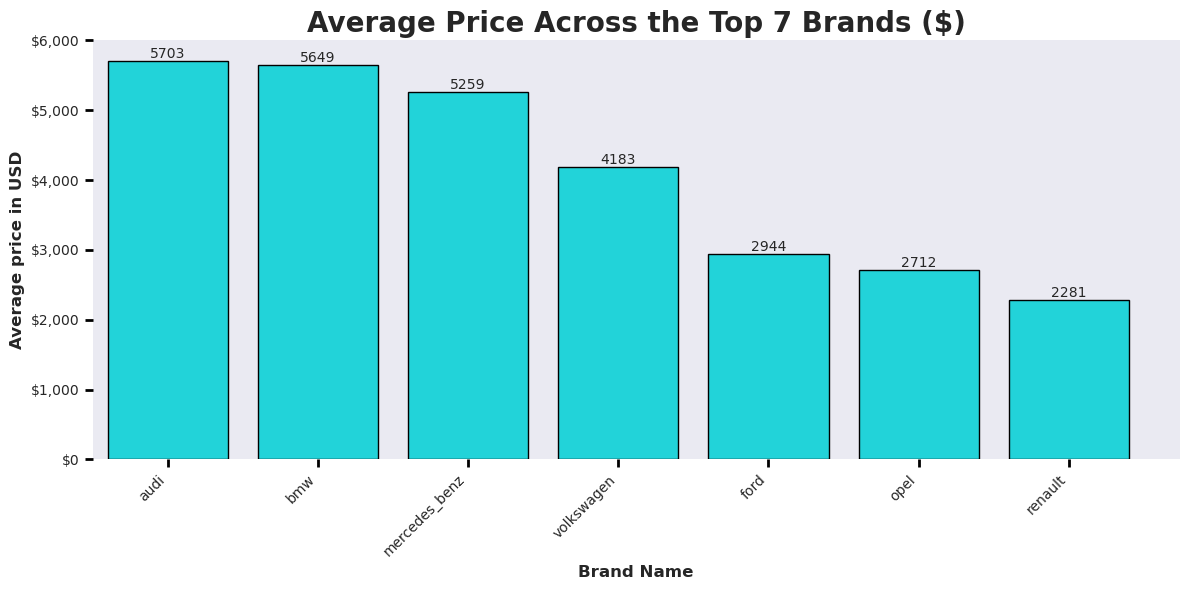

In [40]:
# Extract only names from the Series 'common_brands' using 'index' attribute
brand_names = common_brands.index
# Dict to store aggregate data
brand_mean_prices = {}

for name in brand_names:
    selected_rows = autos[autos['brand'] == name]
    mean_prices = selected_rows['price_usd'].mean()
    brand_mean_prices[name] = int(mean_prices)

# Sort the dictionary in descending order
brand_mean_prices = dict(sorted(brand_mean_prices.items(), key=lambda x: x[1], reverse=True))

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar chart
bar_plot = ax.bar(brand_mean_prices.keys(), brand_mean_prices.values(), color='#22D3D9', edgecolor='black')

# Set the x and y axis labels and title
ax.set_xlabel('Brand Name', fontsize=12, fontweight='bold')
ax.set_ylabel('Average price in USD', fontsize=12, fontweight='bold')
ax.set_title('Average Price Across the Top 7 Brands ($)', fontsize=20, fontweight='bold')

# Set the x-tick label properties
ax.set_xticklabels(brand_mean_prices.keys(), rotation=45, fontsize=10, ha='right')
ax.tick_params(axis='x', length=6, width=2, color='black')
ax.set_xlim(left=-0.5) # Add this line to set the left limit of the x-axis to -0.5

# Set the y-tick label properties
yticks = np.arange(0, max(brand_mean_prices.values())+1000, 1000)
ax.set_yticks(yticks)
ax.set_yticklabels(['${:,.0f}'.format(y) for y in yticks], fontsize=10)
ax.tick_params(axis='y', length=6, width=2, color='black')

# Set the bar label properties
for i, rect in enumerate(bar_plot):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height,
            '{:.0f}'.format(list(brand_mean_prices.values())[i]), ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()

**Observations**
* Asides from Opel, the German brands (Audi, BMW and Mercedes Benz) seem more expensive on average than the American or French ones.
* The average price for Volkswagon seems to be at the middle point of all these prices, offering an interesting balance between its popularity and price.

### The Top 7 Brands - Exploring Mileage

For the top 7 brands, we will use aggregation to understand the average mileage for those cars and if there's any visible link with mean price. Rather than display both aggregated Series objects and visually compare them, we'll combine the data from both Series objects into a single DataFrame (with a shared index) and display the DataFrame directly.

We have `brand_mean_prices` as dictionary, next we'll convert this dictionary into pandas DataFrame using the [`pd.DataFrame.from_dict()` constructor](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html). We'll also pass `orient='index'` in the constructor to make `brand names` as the index.

In [41]:
brands_df = pd.DataFrame.from_dict(brand_mean_prices, orient='index', columns=['mean_price_usd'])
brands_df

,mean_price_usd
audi,5703
bmw,5649
mercedes_benz,5259
volkswagen,4183
ford,2944
opel,2712
renault,2281


Lets repeat the same process for the `odometer_km` column. We'll calculate the average mileage of the cars in the top 7 brands, then construct a Series object from our results.

In [42]:
# Calculate mean of 'odometer_km'
brand_mean_mileage = {}

for name in brand_names:
    selected_row = autos[autos['brand']==name]
    mean_mileage = selected_row['odometer_km'].mean()
    brand_mean_mileage[name] = int(mean_mileage)

# Convert dict into Series
mileage_series = pd.Series(brand_mean_mileage)
mileage_series

volkswagen       132813
opel             130500
bmw              138833
mercedes_benz    138411
audi             139701
ford             127004
renault          128892
dtype: int64

Finally, we'll join the average price and mileage together to enable us compare their results at a glance. One way we can do this is by assigning `mileage_seriest` to a new column in the `brands_df` DataFrame.

In [43]:
brands_df['mean_mileage_km'] = mileage_series
brands_df

,mean_price_usd,mean_mileage_km
audi,5703,139701
bmw,5649,138833
mercedes_benz,5259,138411
volkswagen,4183,132813
ford,2944,127004
opel,2712,130500
renault,2281,128892


Now that we have the averages on both price and mileage, lets draw a bar plot and visualize the results in comparison.

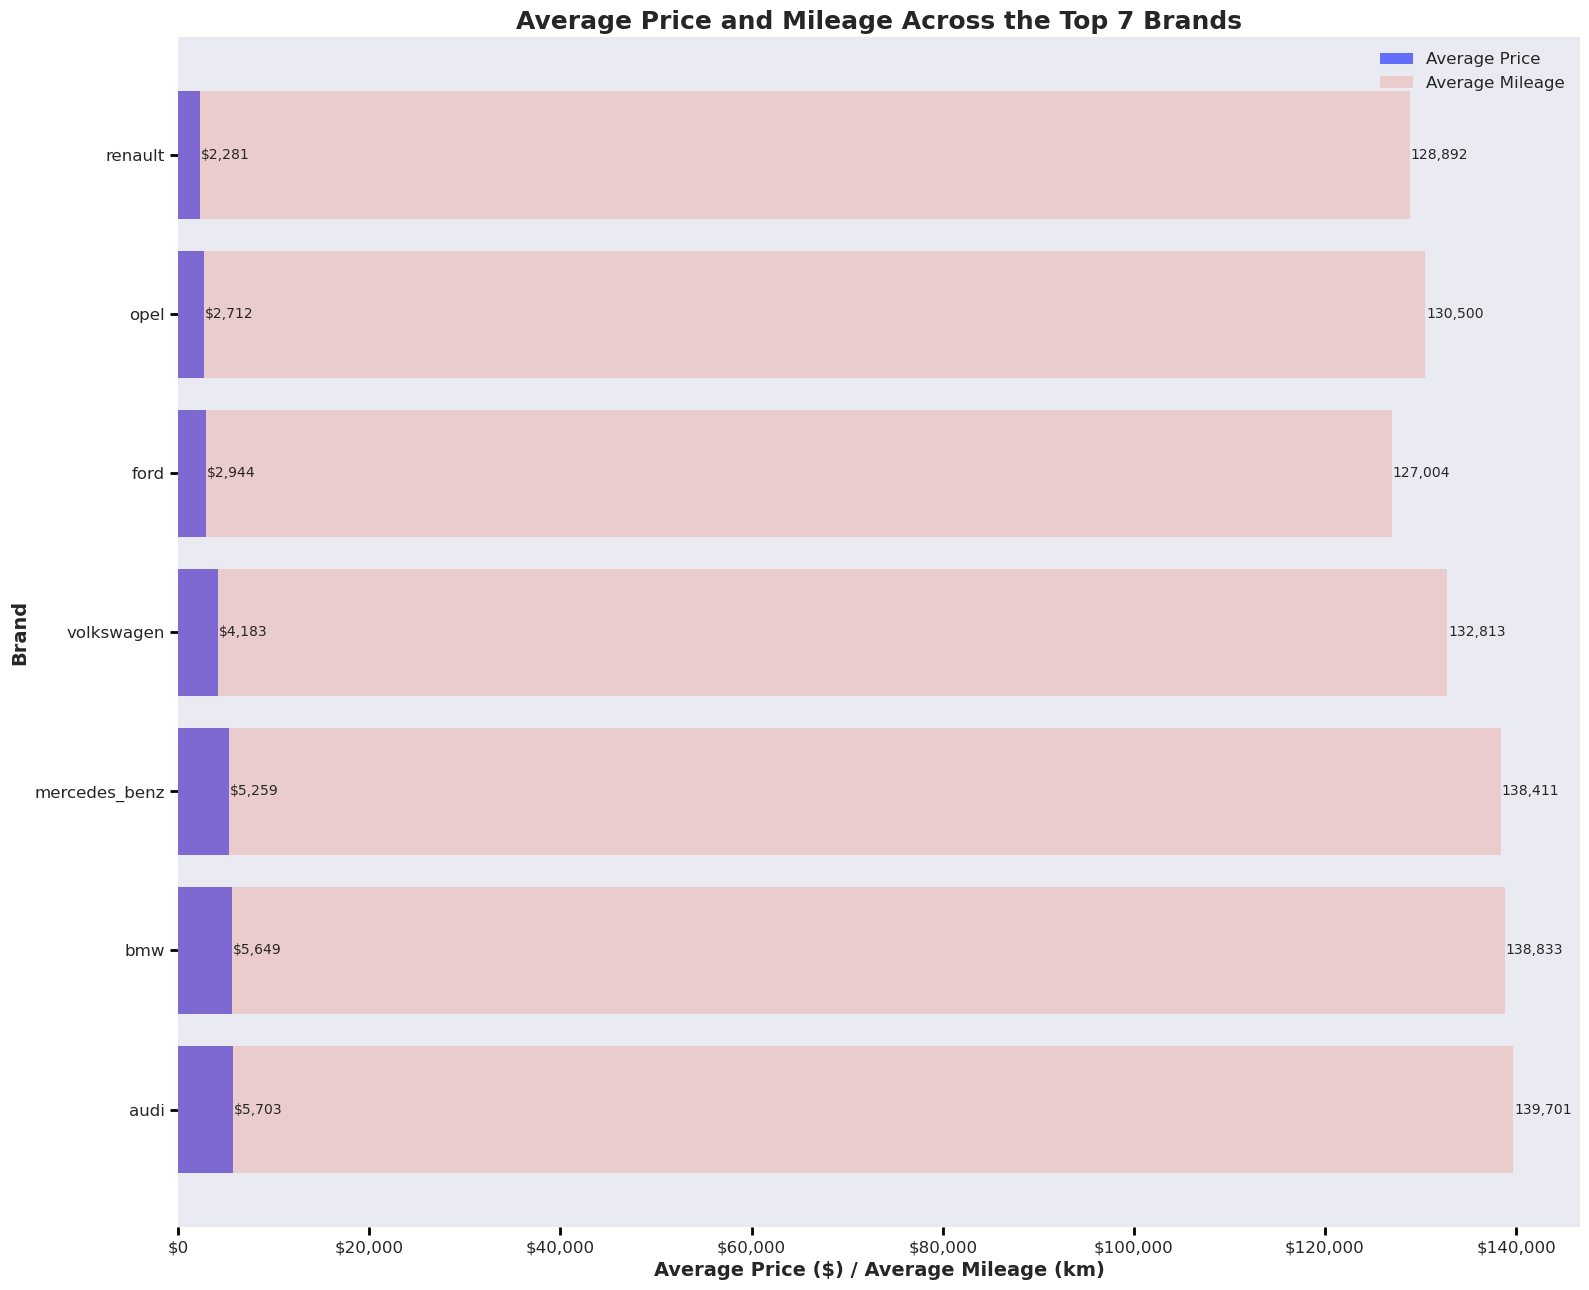

In [44]:
# Sort the dataframe by mean price in descending order
brands_df.sort_values('mean_price_usd', ascending=False, inplace=True)

# Plot bar chart of mean price and mean mileage for each brand
fig, ax = plt.subplots(figsize=(16, 13))

bar_plot1 = ax.barh(brands_df.index, brands_df['mean_price_usd'], color='#636EFA')
bar_plot2 = ax.barh(brands_df.index, brands_df['mean_mileage_km'], color='#EF553B', alpha=0.2)

# Set the title and axis labels
ax.set_title('Average Price and Mileage Across the Top 7 Brands', fontsize=18, fontweight='bold')
ax.set_xlabel('Average Price ($) / Average Mileage (km)', fontsize=14, fontweight='bold')
ax.set_ylabel('Brand', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', length=6, width=2, color='black', labelsize=12)
ax.tick_params(axis='y', length=6, width=2, color='black', labelsize=12)

# Add a legend
ax.legend((bar_plot1[0], bar_plot2[0]), ('Average Price', 'Average Mileage'), fontsize=12)

# Add dollar signs to the x-axis tick labels
ax.set_xticklabels(['${:,.0f}'.format(x) for x in ax.get_xticks()])

# Add value labels to the bars
for i, rect in enumerate(bar_plot1):
    width = rect.get_width()
    ax.text(width + 100, rect.get_y() + rect.get_height()/2.0,
            '${:,.0f}'.format(brands_df['mean_price_usd'][i]), ha='left', va='center', fontsize=10)
    
for i, rect in enumerate(bar_plot2):
    width = rect.get_width()
    ax.text(width + 100, rect.get_y() + rect.get_height()/2.0,
            '{:,.0f}'.format(brands_df['mean_mileage_km'][i]), ha='left', va='center', fontsize=10)

    
plt.tight_layout()
plt.show()

**Observations**
* We would expect car prices to fall as mileage increases. However this is not the case here as we notice the more expensive vehicles having higher mileage, and the cheaper ones recording lower mileages.
* We see Volkswagen at the median of the mileage values again. Could its popularity on the listings be perhaps attributable to its balance in price and mileage?

### Popular Brand Model Combinations

We already have information on the most common brands. It would be interesting to know which particular models contribute to the brand's popularity on the listings.

Pandas has a handy `groupby()` method that enables us to group large amounts of data from a DataFrame then compute aggregations on these groups. Our action will a simple two-step process:
* First, we'll extract the two columns of interest(`brand` and `model`) from our `autos` DataFrame.
* Next, we'll group the distinct occurrence of each brand and model using the `groupby()` method, then compute aggregations of each model's frequency.

In [45]:
# Extract the relevant columns from 'autos' DataFrame
brand_model = autos[['brand', 'model']]
brand_model_grouped = brand_model.groupby(['brand', 'model'])['model'].count()

# Reset multi-index Series to DataFrame
# and assign a name to the aggregated column
brand_model_grouped = brand_model_grouped.reset_index(name='count')

# View the DataFrame after resetting index
brand_model_grouped.head()

,brand,model,count
0,alfa_romeo,145,4
1,alfa_romeo,147,80
2,alfa_romeo,156,88
3,alfa_romeo,159,32
4,alfa_romeo,andere,55


This looks much better, but we only need information on the most popular cars. We need to sort the entire DataFrame in descending order based on the values in the `count` column.

In [46]:
# Sort column 'count' in descending order
brand_model_sorted = brand_model_grouped.sort_values(by='count', axis='index', ascending=False)
brand_model_sorted.head()

,brand,model,count
262,volkswagen,golf,3487
22,bmw,3er,2431
268,volkswagen,polo,1604
179,opel,corsa,1589
176,opel,astra,1339


We now have the sorted DataFrame, lets extract the **top 15 models** and plot them.

In [47]:
# Top 15 brands
top_15_brands = brand_model_sorted.head(15)

# Create bar plot
fig = px.bar(top_15_brands, x='brand', y='count', color='brand', text='model')
fig.update_layout(height = 600,
                  width = 1000,
                  # title
                  title = dict(text='<b>Most Popular Brand & Model Combinations</b>', x=0.5, y=0.95,
                  font = dict(family="Arial", size=20, color='#000000')),
                  # x and y axes
                  xaxis = dict(showgrid=False, showline=True, linewidth=2, linecolor='black'),
                  yaxis = dict(showgrid=False, showline=True),
                  xaxis_title = "<b>Brand Name</b>",
                  yaxis_title = '<b>Count of Model</b>',
                  font = dict(family="Arial", size=12, color='#000000'))

fig.show()

**Observations**
* **We'd immediately notice the agreement of this pattern with what we observed in the brands. Volkswagen, BMW, Opel, Audi, Mercedes Benz, Ford, Renault remain the top brands**:
    * The most popular Volkswagen models are the Golf, Polo and Passat.
    * The most popular BMW models are the 3er and 5er series.
    * The most popular Opel models are Corsa and Astra.
    * Audi is popular with its A-series models (a4, a3 and a6).
    * Mercedes is popular with the c and e class.
    * Ford is popular with its focus and fiesta models while the most popular Renault model is the Twingo.

### Does Mileage Influence Price?

Lets explore how odometer readings influence the average price of a listed car. We'll divide our odometer readings into intervals then inspect for any interesting price patterns as mileage increases. Lets examine the unique values in `odometer_km`.

In [48]:
sorted(autos['odometer_km'].unique())

[5000,
 10000,
 20000,
 30000,
 40000,
 50000,
 60000,
 70000,
 80000,
 90000,
 100000,
 125000,
 150000]

There are not many unique values in this column, and it appears that the values in this column are round to the nearest thousands. We can split our odometer readings into seven intervals as follows:

```
    5000km - 1000km
    20000km - 30000km
    40000km - 50000km
    60000km - 70000km
    80000km - 90000km
    100000km - 125000km
    150000km or more
```

These intervals are few and easy to work with, so we'll create a dictionary to hold them.

In [49]:
odometer_groups = {
    5000: '5000km - 10000km',
    10000: '5000km - 10000km',
    20000: '20000km - 30000km',
    30000: '20000km - 30000km',
    40000: '40000km - 50000km',
    50000: '40000km - 50000km',
    60000: '60000km - 70000km',
    70000: '60000km - 70000km',
    80000: '80000km - 90000km',
    90000: '80000km - 90000km',
    100000: '100000km - 125000km',
    125000: '100000km - 125000km',
    150000: '150000km or more'
}

Lets extract the relevant columns (`odometer_km` and `price_usd`) into a new variable called `mileage`.

Next, we can map the values from the `odometer_groups` dictionary into `odometer_km` column. We can use our handy `column_translator()` function to achieve this.

In [50]:
# Extract 'odometer_km and price_usd' columns
mileage = autos[['odometer_km', 'price_usd']]

column_translator(df=mileage, column='odometer_km', dict_value=odometer_groups)
mileage.head()

,odometer_km,price_usd
0,150000km or more,5000
1,150000km or more,8500
2,60000km - 70000km,8990
3,60000km - 70000km,4350
4,150000km or more,1350


Our odometer groups have been successfully mapped to the `odometer_km`. Lets use the `groupby()` method to compute the average price in each mileage group.

In [51]:
price_by_mileage = (mileage.groupby('odometer_km')['price_usd'].mean()
                    .reset_index(name='avg_price_usd')
                    .sort_values(by='avg_price_usd', axis='index', ascending=False))

# Round off the values of 'avg_price_usd' and convert dtype to 'int'
price_by_mileage['avg_price_usd'] = price_by_mileage['avg_price_usd'].round().astype(int)

In [52]:
# View 'price_by_mileage' results
price_by_mileage

,odometer_km,avg_price_usd
3,40000km - 50000km,8109
2,20000km - 30000km,7861
5,60000km - 70000km,7148
6,80000km - 90000km,6224
0,100000km - 125000km,5068
4,5000km - 10000km,3592
1,150000km or more,3298


Now we have the average price by odometer interval. Lets interpret the results through visualization.

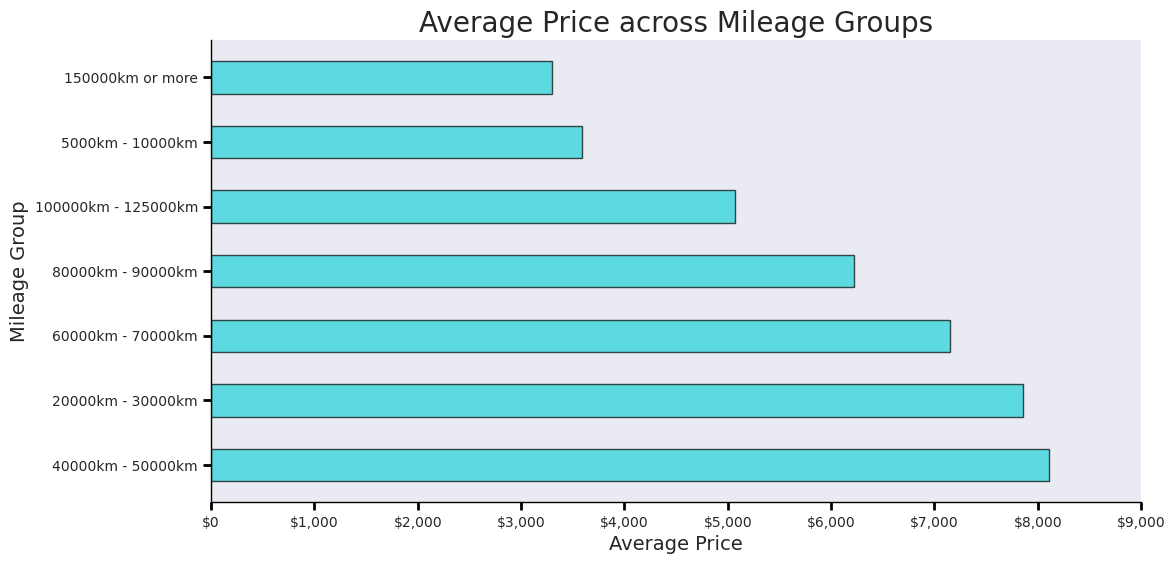

In [53]:
# Create a horizontal bar plot with reduced bar width
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(price_by_mileage['odometer_km'], price_by_mileage['avg_price_usd'],
        height=0.5, color='#22D3D9', alpha=0.7, edgecolor='black', linewidth=1,
        align='center', capsize=3, ecolor='black', error_kw={'linewidth':1, 'capsize':3, 'capthick':1})

# Set the plot title and axis labels
ax.set_title('Average Price across Mileage Groups', fontsize=20)
ax.set_xlabel('Average Price', fontsize=14)
ax.set_ylabel('Mileage Group', fontsize=14)

# Set the y and x axes ticks and format the labels as currency
ax.set_xticks(range(0, 10000, 1000))
ax.set_xticklabels(['${:,.0f}'.format(x) for x in ax.get_xticks()])
ax.tick_params(axis='x', length=6, width=2, color='black', labelsize=10)
ax.tick_params(axis='y', length=6, width=2, color='black', labelsize=10)

# Set the spines' color and width
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)


plt.show()

**Observation**:

The relationship between price and mileage is not as easily predictable as expected. One would expect higher mileage cars to be priced lower, but our data shows that:

- Medium mileage cars are the most expensive on average. This comprises vehicles that have travelled between (20,000 - 50,000km). Their average prices range between 7,861 to 8,100 USD
- Moderate to High mileage cars (60,000 - 120,000km) follow behind, with average prices ranging from about 5,000 to 71,000 USD
- As expected, the highest mileage cars (150,000km or more) are priced the least.
- We observe some unexpected findings with the lowest mileage cars (5000 to 10000km). Though one would expect these cars to be priced the highest, they are priced far lower than expected. It is hard to tell what could have caused this for sure, but this group could comprise cars that got damaged shortly after their purchase.

**Could there be a lurking variable somewhere?**

### Price and Unrepaired Damage

We had suggested that the drop in average price of the low mileage cars may be due to some cars that damaged shortly after their purchase. Next, we'll find out if damaged cars are cheaper, especially when compared to their non-damaged counterparts.

Before we proceed, lets take another look at the `unrepaired_damage`.

In [54]:
print('COUNTS')
print('-'*30)
print(autos['unrepaired_damage'].value_counts(dropna=False))
print()
print('COUNTS')
print('-'*30)
print(autos['unrepaired_damage'].value_counts(dropna=False, normalize=True))

COUNTS
------------------------------
no     30361
NaN     8112
yes     4486
Name: unrepaired_damage, dtype: int64

COUNTS
------------------------------
no     0.706744
NaN    0.188831
yes    0.104425
Name: unrepaired_damage, dtype: float64


A huge percentage of cars (about 70%) in our dataset are in good condition. 10% of the car listings have unrepaired damages and we lack enough information on the status of the remaining 19%. The null values in this group will not be useful for our analysis.

We can create our working DataFrame from the `price_usd` and `unrepaired_damage` columns, then drop the rows with null values.

In [55]:
# Assign 'price_usd' and 'unrepaired_damage' to a new vairable
price_damage_df = autos[['price_usd', 'unrepaired_damage']]
print(price_damage_df.shape)

# Drop null values from 'unrepaired_damage'
price_damage_df.dropna(subset=['unrepaired_damage'], axis='index', inplace=True)

# Verify the number of rows after dropping null values
print(f'Remaining rows: {price_damage_df.shape[0]}')
price_damage_df.head()

(42959, 2)
Remaining rows: 34847


,price_usd,unrepaired_damage
0,5000,no
1,8500,no
2,8990,no
3,4350,no
4,1350,no


Next we'll group by `unrepaired_damage` while computing the average prices for both `yes` and `no` categories, and visualize the results.

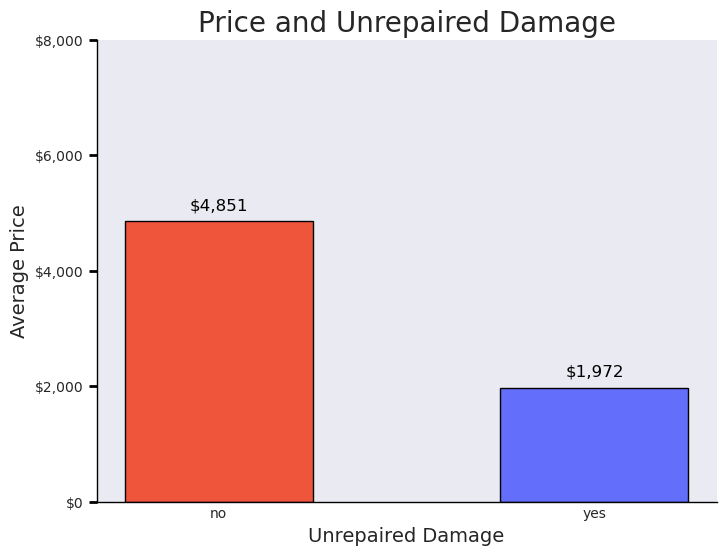

In [56]:
# Find average of 'yes' and 'no' in the 'unrepaired_damage'
price_of_damage = (price_damage_df.groupby('unrepaired_damage')['price_usd'].mean()
                          .reset_index(name='avg_price_usd'))

# Convert data type of 'avg_price_usd' to integer
price_of_damage['avg_price_usd'] = price_of_damage['avg_price_usd'].round().astype(int)

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(price_of_damage['unrepaired_damage'], price_of_damage['avg_price_usd'], 
       color=['#EF553B', '#636EFA'], edgecolor='black', width=0.5, linewidth=1)

# Set the plot title and axis labels
ax.set_title('Price and Unrepaired Damage', fontsize=20)
ax.set_xlabel('Unrepaired Damage', fontsize=14)
ax.set_ylabel('Average Price', fontsize=14)

# Set the y-axis ticks and format the labels as currency
ax.set_yticks(range(0, 10000, 2000))
ax.set_yticklabels(['${:,.0f}'.format(x) for x in ax.get_yticks()])
ax.tick_params(axis='y', length=6, width=2, color='black', labelsize=10)

# Set the spines' color and width
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

# Add labels to the bars
for i, v in enumerate(price_of_damage['avg_price_usd']):
    ax.text(i, v+200, '${:,.0f}'.format(v), color='black', ha='center', fontsize=12)


plt.show()

**Observation**
* There is a huge variation in price between these two groups. We can safely say that on average, cars in good condition are **2.5 times** more expensive than those with unrepaired damages.

Now that we have established that unrepaired damage has a significant effect on price, we can go further to explore the reason for the **shocking low prices observed for the lowest mileage cars (5,000 - 10,000km)**.

### Were the Lowest Mileage Cars Affected By Some Sort of Early Damage?

To conduct this investigation, we need two columns from our cleaned DataFrame (`odometer_km` and `unrepaired_damage`). We'll perform our analysis in four steps:
1. We'll collect the two columns into a seperate DataFrame.
2. We'll use the `column_translator()` function to map `odometer_km` to the respective mileage intervals.
3. We'll remove the null values from `unrepaired_damage` and maap the column to dummy variables: **1 for 'yes'**, **0 for 'no'**.
4. Finally, we'll use the `groupby()` method to compute the damaged cars ratio. This ratio represents the weight of `unrepaired_damage` to the number of cars in each mileage interval (we can do this by calculating the mean of unrepaired damage).

Lets take these steps one after the other:

**1. Collect the required columns into a seperate DataFrame.**

In [57]:
working_df = autos[['odometer_km', 'unrepaired_damage']]

**2. Map the Odometer column to the respective mileage intervals.**

In [58]:
column_translator(df=working_df,
                  column='odometer_km',
                  dict_value=odometer_groups)

**3. Remove the null values from the unrepaired damage and map the column to dummy variables 1 and 0.**

In [59]:
working_df.dropna(subset=['unrepaired_damage'], axis='index', inplace=True)

column_translator(df=working_df,
                  column='unrepaired_damage',
                  dict_value={'yes': 1, 'no': 0})

**4. Compute the average value of unrepaired_damage to number of cars in each mileage interval.**

In [60]:
grouped_df = (working_df.groupby('odometer_km')['unrepaired_damage'].mean()
                 .reset_index(name='damage_cars_ratio'))

grouped_df['damage_cars_ratio'] = grouped_df['damage_cars_ratio'].round(3)
grouped_df.sort_values(by='damage_cars_ratio', ascending=False, axis=0, inplace=True)
grouped_df

,odometer_km,damage_cars_ratio
4,5000km - 10000km,0.212
1,150000km or more,0.150
0,100000km - 125000km,0.095
6,80000km - 90000km,0.081
5,60000km - 70000km,0.068
2,20000km - 30000km,0.062
3,40000km - 50000km,0.053


There are some insights in the table above. However, before making further observations, we'll merge our `avg_price_usd` from the previous `price_by_mileage` DataFrame into our new DataFrame, then visualize for a more robust picture.

In [61]:
# Merge 'avg_price_usd' from old to new DataFrame
grouped_df['avg_price_usd'] = price_by_mileage['avg_price_usd']
grouped_df

,odometer_km,damage_cars_ratio,avg_price_usd
4,5000km - 10000km,0.212,3592
1,150000km or more,0.150,3298
0,100000km - 125000km,0.095,5068
6,80000km - 90000km,0.081,6224
5,60000km - 70000km,0.068,7148
2,20000km - 30000km,0.062,7861
3,40000km - 50000km,0.053,8109


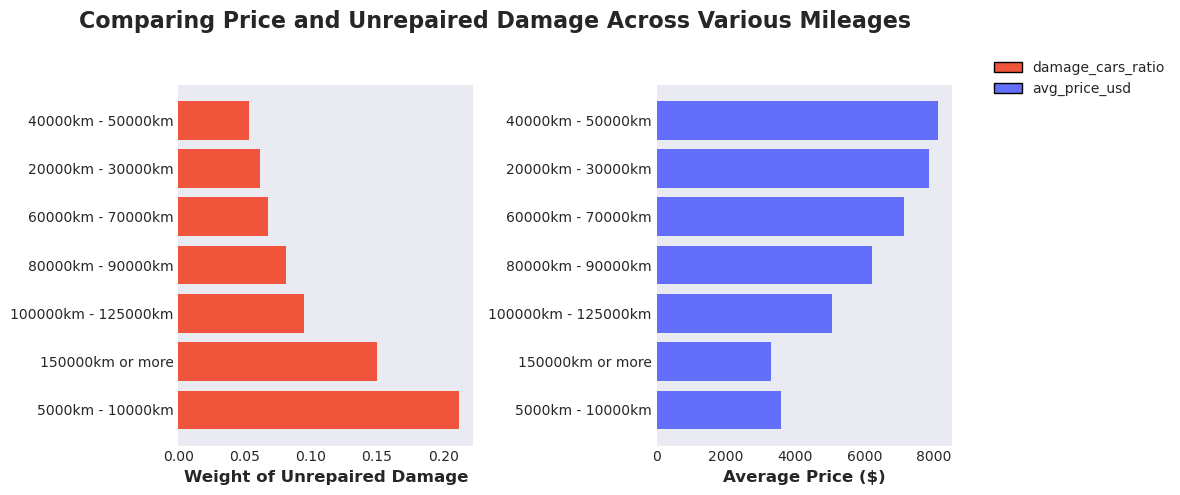

In [62]:
# Create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Bar plot for 'damage_cars_ratio'
axs[0].barh(y=grouped_df['odometer_km'], width=grouped_df['damage_cars_ratio'], color='#EF553B')
axs[0].set_xlabel('Weight of Unrepaired Damage', fontsize=12, fontweight='bold')

# Bar plot for 'avg_price_usd'
axs[1].barh(y=grouped_df['odometer_km'], width=grouped_df['avg_price_usd'], color='#636EFA')
axs[1].set_xlabel('Average Price ($)', fontsize=12, fontweight='bold')

# Add a title to the figure
fig.suptitle('Comparing Price and Unrepaired Damage Across Various Mileages', fontsize=16, fontweight='bold')

# Add a legend
legend_elements = [Patch(facecolor='#EF553B', edgecolor='black', label='damage_cars_ratio'),
                   Patch(facecolor='#636EFA', edgecolor='black', label='avg_price_usd')]
axs[1].legend(handles=legend_elements, bbox_to_anchor=(1.1, 1.1))


plt.tight_layout()
plt.show()

**Observations**
* The price trend we noticed before can be better explained when considering unrepaired damage. Here we see the best-priced cars having the lowest weight of unrepaired damage, while the poorly priced vehicles have a higher occurrence of damages within their group.
* It is evident that the **prices for the low mileage cars were affected by the significant cases of unrepaired damage within the group (a weight of 0.21)**. This further confirms our suspicions that some of the low mileage vehicles were new vehicles that may have been damaged within a short duration of purchase.
* We had expected newer vehicles to have lesser mileages and better prices overall. However, it appears that the presence or absence of unrepaired damage may be a better determinant of price.
* Prices drop as unrepaired damage increases (inverse correlation). This can even occur irrespective of how impressive a car's mileage is.

## Creating Value Metric

Since we know a few variables that can influence price. We'll attempt to create a metric that could help us analysis the price-value ratio for all the listed cars. We'll consider the following as determinants in our ratio:
* The price of the car
* Mileage
* The presence or absence of an unrepaired damage

### 1. Price to Mileage Ration

First we'll create a price to mileage ratio by dividing our `price_usd` by the mileage (`odometer_km`). The unit for this ratio will be usd/km travelled. Lets consider an example below:

In [63]:
# Car A is priced at 5,000 USD but has travelled 10,000km
car_a_price = 5000
car_a_mileage = 10000

# Car B is priced at 5,000 USD but has travelled 150,000km
car_b_price = 5000
car_b_mileage = 150000

# Compute both car's price to mileage ratio
pm_ratio_car_a = car_a_price/car_a_mileage
pm_ratio_car_b = car_b_price/car_b_mileage

print(f'The price/mileage ratio of car A is: {pm_ratio_car_a:.2f}')
print(f'The price/mileage ratio of car B is: {pm_ratio_car_b:.2f}')

The price/mileage ratio of car A is: 0.50
The price/mileage ratio of car B is: 0.03


The output above illustrates the benefits of this ratio. Even when we set cars A and B at the same price, car A offers more value than car B because it has considerably covered less distance.

When considering price to mileage ratio, we should be mindful that cars with extremely high prices can appear to have better ratios than cheaper cars. For example, a car that costs 1,000,000 USD and has a mileage of 150,000 km may appear to hold a better value than a similar car that is priced at 100,000 USD with the same mileage. The code cell below illustrates this detail:

In [64]:
print(f'Expensive Car (price: 1,000,000 USD, mileage: 150,000 km) - price/mileage: {1000000/150000:.2f}')
print(f'Cheaper Car (price: 100,000 USD, mileage: 150,000 km) - price/mileage: {100000/150000:.2f}')

Expensive Car (price: 1,000,000 USD, mileage: 150,000 km) - price/mileage: 6.67
Cheaper Car (price: 100,000 USD, mileage: 150,000 km) - price/mileage: 0.67


These extremely high prices will not affect our analysis, considering that we already cleaned our data to contain more acceptable price ranges. Recall, during the cleaning phase, when we set our maximum price 16,350 USD!

In [65]:
# Review price range from our cleaned dataset
autos[['odometer_km', 'price_usd']].describe()

,odometer_km,price_usd
count,42959.000000,42959.000000
mean,129684.582974,4129.176680
std,36385.094333,3863.748169
min,5000.000000,1.000000
25%,125000.000000,1150.000000
50%,150000.000000,2750.000000
75%,150000.000000,6000.000000
max,150000.000000,16350.000000


Lets create a new DataFrame where we'll store our price to mileage ratio. This DataFrame will contain the following columns from our `autos` dataset: `brand, model`, `odometer_km`, `unrepaired_damage`, and `price_usd`.

In [66]:
price_value_df = autos[['brand', 'model', 'odometer_km', 'unrepaired_damage', 'price_usd']]
price_value_df.head()

,brand,model,odometer_km,unrepaired_damage,price_usd
0,peugeot,andere,150000,no,5000
1,bmw,7er,150000,no,8500
2,volkswagen,golf,70000,no,8990
3,smart,fortwo,70000,no,4350
4,ford,focus,150000,no,1350


Next, lets compute the `price_damage` ratio for each record, then assign the values to a new column called `pm_ratio`.

In [67]:
price_value_df['pm_ratio'] = price_value_df['price_usd']/price_value_df['odometer_km']
price_value_df.head()

,brand,model,odometer_km,unrepaired_damage,price_usd,pm_ratio
0,peugeot,andere,150000,no,5000,0.033333
1,bmw,7er,150000,no,8500,0.056667
2,volkswagen,golf,70000,no,8990,0.128429
3,smart,fortwo,70000,no,4350,0.062143
4,ford,focus,150000,no,1350,0.009000


### 2. Accounting for Unrepaired Damage

Our value metric will be incomplete without accouting for unrepaired damage. If a car has some unrepaired damage, we'll **halve** its price to mileage ratio (*the decision to halve these values is majorly subjective. One may come up with a much better way to account for unrepaired damage than we've done in this project*).

Lets apply this updated measure to our DataFrame.

In [68]:
# Drop rows with NaN values
price_value_df.dropna(axis=0, inplace=True)

# Boolean indexing to select listings with unrepaired damage
selector = price_value_df['unrepaired_damage'] == 'yes'

# Copy pm ratio to a new column
price_value_df['corrected_ratio'] = price_value_df['pm_ratio']

# Halve the corrected ratio if unrepaired damage is 'yes'
price_value_df.loc[selector, 'corrected_ratio'] = price_value_df.loc[selector, 'corrected_ratio']*0.5

In [69]:
# Examine the records with unrepaired damage
price_value_df[selector].head()

,brand,model,odometer_km,unrepaired_damage,price_usd,pm_ratio,corrected_ratio
28,mini,cooper,150000,yes,5250,0.035000,0.017500
30,peugeot,2_reihe,150000,yes,80,0.000533,0.000267
51,mercedes_benz,s_klasse,150000,yes,6000,0.040000,0.020000
81,nissan,micra,150000,yes,2000,0.013333,0.006667
86,mitsubishi,colt,125000,yes,399,0.003192,0.001596


In [70]:
# Examine the records withoud unrepaired damage
price_value_df[~selector].head()

,brand,model,odometer_km,unrepaired_damage,price_usd,pm_ratio,corrected_ratio
0,peugeot,andere,150000,no,5000,0.033333,0.033333
1,bmw,7er,150000,no,8500,0.056667,0.056667
2,volkswagen,golf,70000,no,8990,0.128429,0.128429
3,smart,fortwo,70000,no,4350,0.062143,0.062143
4,ford,focus,150000,no,1350,0.009000,0.009000


**Observations**
* Our code worked as intended. The price to mileage ratio for listings with unrepaired damage have been halved while listings without unrepaired damage were left unaffected.

A metric is usually more beneficial when set at a defined range of values. **Our corrected metric needs one more adjustment**. We need to develop a 'normalized' or 'reference' range where we expect our ratios to fail.

In [71]:
price_value_df[['corrected_ratio']].describe()

,corrected_ratio
count,33664.000000
mean,0.055055
std,0.138390
min,0.000003
25%,0.009000
50%,0.022667
75%,0.056000
max,3.190000


We can see that our lowest price-value ratio is approximately zero while the highest is about 3. With the knowledge our minimum and maximum values, we can scale these values between `0` and `10` as the value for money paid = where `10` represents complete value for money and `0` represents no value for money at all.

## 3. Scaling Price to Value Ratio into a Defined Range

Lets say we want to scale a range of values min to max **`[min..max]`** into a defined range A to B **`[A..B]`**.

```
       Any value 'x' between min and max can be scaled into the range [A..B] as follows:

                                         (B - A) (x - min)
       Value of x in range [A..B] =    -------------------  + A
                                             max - min
```

Since our range **`[A..B]`** is **`[0..10]`**, our formula becomes:

```
                                         (10 - 0) (x - min)
       Value of x in range [0..10] =    -------------------  + 0
                                             max - min
```

Our corrected ratio represented by `x` in the formula above. Hence:

```
                                                        10(x - min)
       corrected ratio(x) in range [0..10] =      ---------------------- 
                                                   max_ratio - min_ratio
```

Lets use this formula to scale our price value ratio between `0` and `10`. We'll call this the potiential `Value_earned` from a purchase.

In [72]:
# Extracting our min and max corrected_ratios
min_ratio = (price_value_df['corrected_ratio']
             .sort_values().iloc[0])

max_ratio = (price_value_df['corrected_ratio']
             .sort_values(ascending=False).iloc[0])

# Compute ratio difference i.e. (max - min)
ratio_diff = max_ratio - min_ratio

# Using previous formula to compute the value for money column
price_value_df['value_earned'] = ((10 * (price_value_df['corrected_ratio'] - min_ratio))/ratio_diff)
price_value_df['value_earned'] = price_value_df['value_earned'].round()
price_value_df.sort_values(by='value_earned', ascending=False).head()

,brand,model,odometer_km,unrepaired_damage,price_usd,pm_ratio,corrected_ratio,value_earned
22424,volkswagen,polo,5000,no,15950,3.19,3.19,10.0
39828,volkswagen,golf,5000,no,15800,3.16,3.16,10.0
24586,opel,andere,5000,no,14900,2.98,2.98,9.0
6921,hyundai,i_reihe,5000,no,15000,3.00,3.00,9.0
29145,bmw,5er,5000,no,14500,2.90,2.90,9.0


Now that we have created our value metric. Lets take a look at the different brands, with respect to value for money i.e. potiential value earned from purchase.

### Best Value for Money Brands

Earlier we had compared the top brands based on popularity and price. Now, we'll use all the handy functions and methods we have used before to compare the various brands based on average value for money.

In [73]:
# Brands based on values
brands_by_value = (price_value_df[['brand', 'value_earned']]
                   .groupby('brand')['value_earned'].mean()
                   .round(2)
                   .reset_index(name='avg_value')
                   .sort_values(by='avg_value', ascending=False))

# Extract top 7 brands
top_7_brands = brands_by_value.head(7)
top_7_brands

,brand,avg_value
6,dacia,0.48
21,mini,0.27
31,skoda,0.24
26,porsche,0.22
3,chevrolet,0.21
12,hyundai,0.21
36,trabant,0.19


Visualize top seven brands by value.

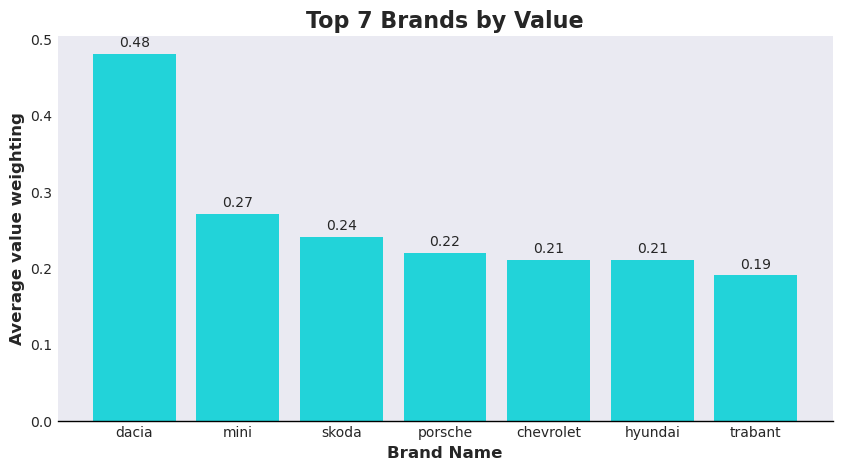

In [74]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Bar plot
ax.bar(x=top_7_brands['brand'], height=top_7_brands['avg_value'], color='#22D3D9')

# Set axis labels and title
ax.set_xlabel('Brand Name', fontsize=12, fontweight='bold')
ax.set_ylabel('Average value weighting', fontsize=12, fontweight='bold')
ax.set_title('Top 7 Brands by Value', fontsize=16, fontweight='bold')

# Add text labels
for i, v in enumerate(top_7_brands['avg_value']):
    ax.text(i, v + 0.01, str(v), ha='center', fontsize=10)

# Set the spines' color and width
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1)


plt.show()

**Observations**
* Considering our newly-created value metric, which weighs the effect of price, mileage and unrepaired damage on a listed car, none of the seven most popular brands are top players in our value for money list.
* Darcia cars top the entire listings with a weighting of 0.48. This Mini brand follows behind (0.27).
* There might not be a huge difference in the value offered by Skoda, Porsche, Chevrolet and Hyundai brands, since their value weightings are almost identical (around 0.23). Buyers can freely select any of these brands without missing out too much on the others.
* The top brands here may not be the most popular on the listings. However, they provide more value for price-conscious buyers. These buyers can obtain good deals, while the rest assured of the balance between quality and value.

### Best Value for Money Models

Now that we have some information on the best value for money brands. We can drill-in to understand the best value for money models available on the listings.

Again, we'll use a couple of handy methods and functions we used before.

In [75]:
models_by_value = (price_value_df[['brand', 'model', 'value_earned']]
                   .groupby(['brand', 'model'])['value_earned'].mean()
                   .round(2)
                   .reset_index(name='avg_value')
                   .sort_values(by='avg_value', ascending=False))

# Extract top 7 models
top_7_models = models_by_value.head(7)
top_7_models

,brand,model,avg_value
194,porsche,911,1.50
224,skoda,citigo,1.45
51,dacia,lodgy,1.20
10,audi,a1,1.10
273,volkswagen,up,1.09
76,ford,b_max,1.00
173,opel,andere,0.91


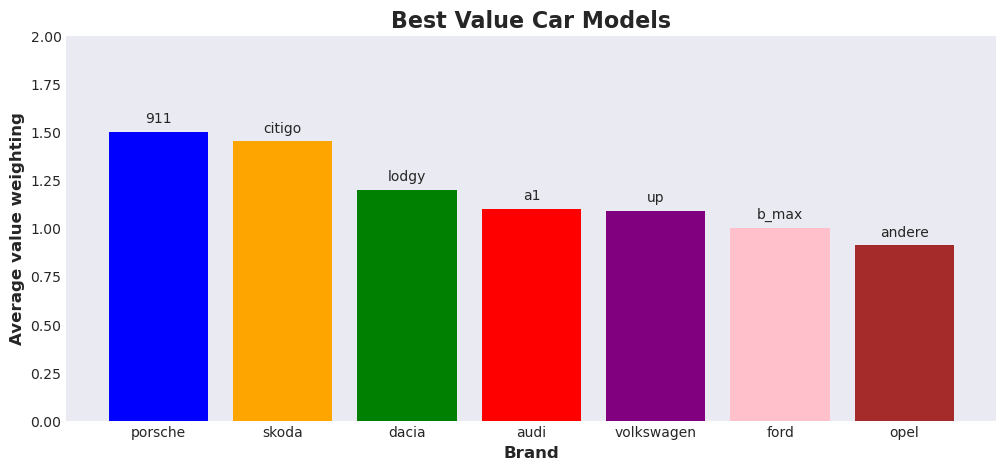

In [76]:
# Define color mapping
colors = {
    'porsche': 'blue',
    'skoda': 'orange',
    'dacia': 'green',
    'audi': 'red',
    'volkswagen': 'purple',
    'ford': 'pink',
    'opel': 'brown'
}

# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 5))
bars = ax.bar(top_7_models['brand'], top_7_models['avg_value'], color=top_7_models['brand'].apply(lambda x: colors[x]))

# Add labels and title
ax.set_xlabel('Brand', fontsize=12, fontweight='bold')
ax.set_ylabel('Average value weighting', fontsize=12, fontweight='bold')
ax.set_title('Best Value Car Models', fontsize=16, fontweight='bold')

# Set y-axis limit
ax.set_ylim([0, 2])

# Add text labels on top of bars
for i, row in top_7_models.iterrows():
    ax.text(row['brand'], row['avg_value']+0.05, row['model'], ha='center', fontsize=10)


plt.show()

**Observations**
* The Porshe 911 has the best value weighting (1.50), while the Skoda Citigo (1.45) follows along. The Darcia lodgy (1.2) is ranked third.
* We see some of the most common brands again (Audi, Volkswagen and Opel). Buyers looking to enjoy the popularity of these brands, while also enjoying significant value benefits, could consider buying the Audi A1, the Volkswagen Up models or the Ford b_max.

## Recommendation for High Value Used Cars

Buyers should be strategic when considering used cars on eBay.

The first step is obvious, search for a vehicle on the listings. Consider the brand (German brands are popular for a reason). If interested in a famous brand, check out the Volkswagen cars. They offer some interesting balance between popularity, mileage and price.

If a lower purchase price is the goal, buyers should carefully consider condition and mileage (they do not always correlate). Even vehicles with low mileage can undergo tremendous wear and tear, negatively impacting value.

The best advice is to consider a value metric, which includes the vehicle price, its mileage, and its condition (taking unrepaired damage into account), before determining whether a car is worth the extra dollars.

## Conclusion

Our analysis of eBay Kleinanzeigen's listings showed the influence of price, mileage and unrepaired damage on a car's overall value. We identified the most popular cars on the website listings, examined the relationship between mileage and price, then explored the effects of unrepaired damage on a car's value. Finally, we created a value metric to help price-conscious buyers in their quest to identify the best value cars.

## Prompts for Future Exploration

* Are certain vehicle types more expensive than others on average?
* Do vehicles with certain fuel types record more cases of unrepaired damage than the others?